# Add 10% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## Age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')


--------------------------------------
no outliers detected


In [4]:
df_a = outliers_utils.outliers_replace(df, 'age', 10)

Outliers found:


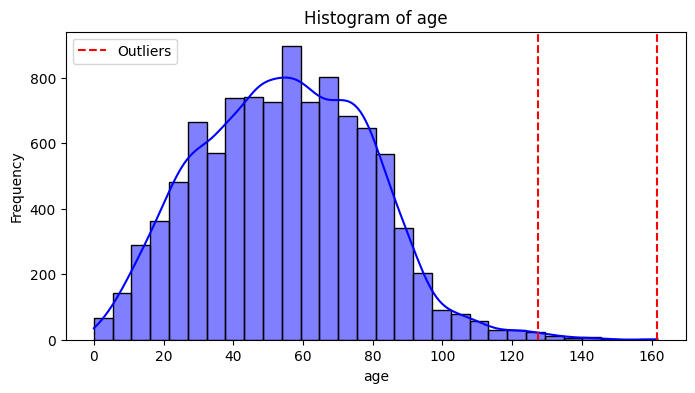

In [5]:
outliers_utils.visualize_outliers_specific(df_a, 'age')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3486
           1       0.96      1.00      0.98      3502

    accuracy                           0.98      6988
   macro avg       0.98      0.98      0.98      6988
weighted avg       0.98      0.98      0.98      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1503
           1       0.93      1.00      0.96      1493

    accuracy                           0.96      2996
   macro avg       0.96      0.96      0.96      2996
weighted avg       0.96      0.96      0.96      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4999
           1       0.95      1.00      0.97      4985

    accuracy                           0.97      9984


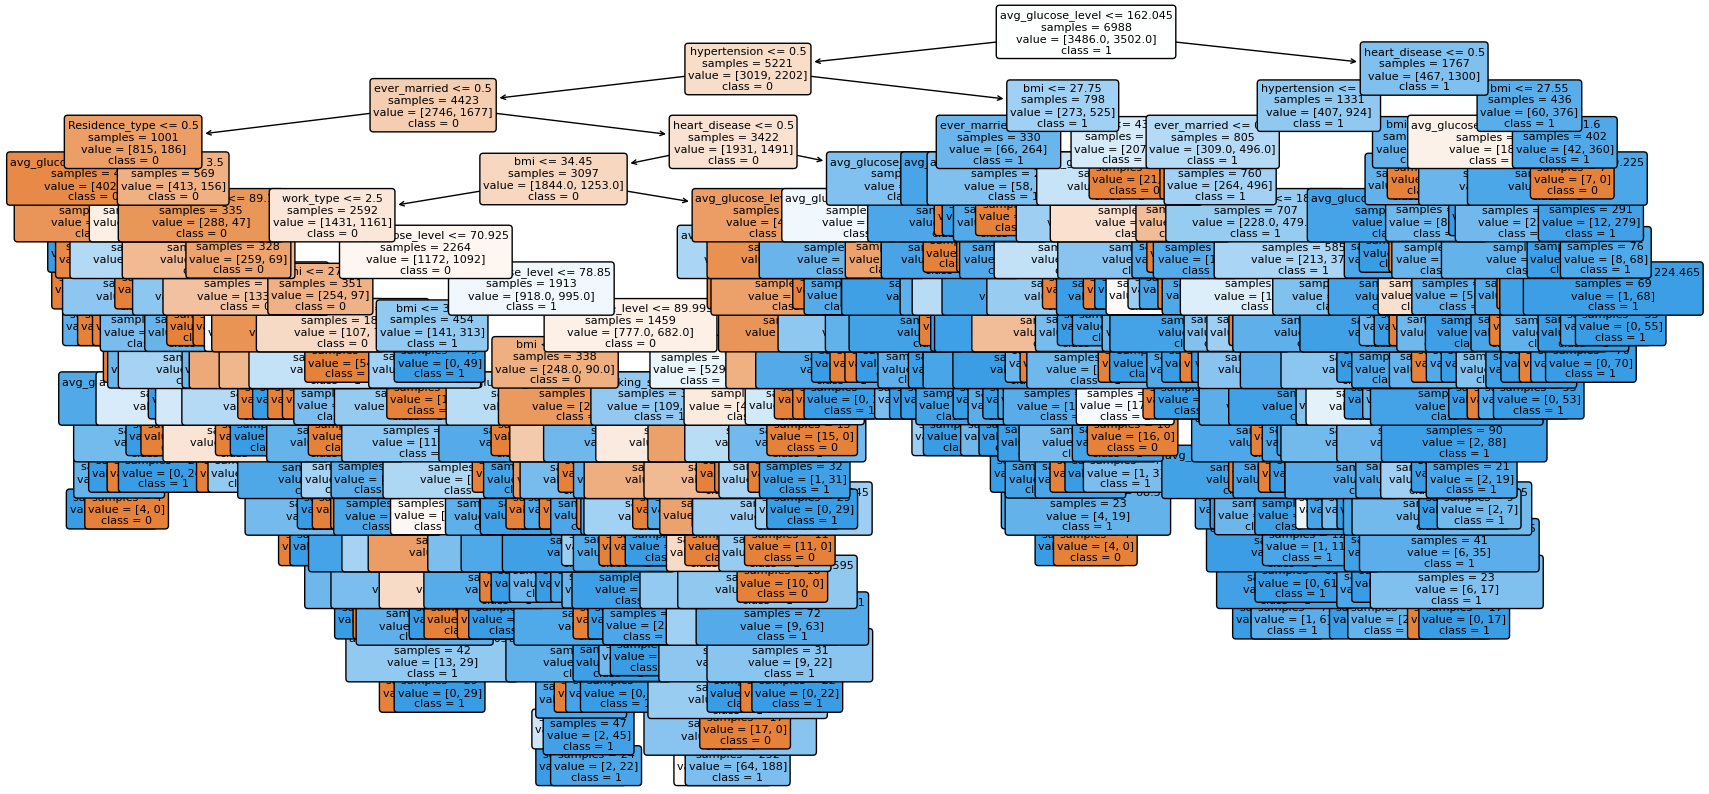

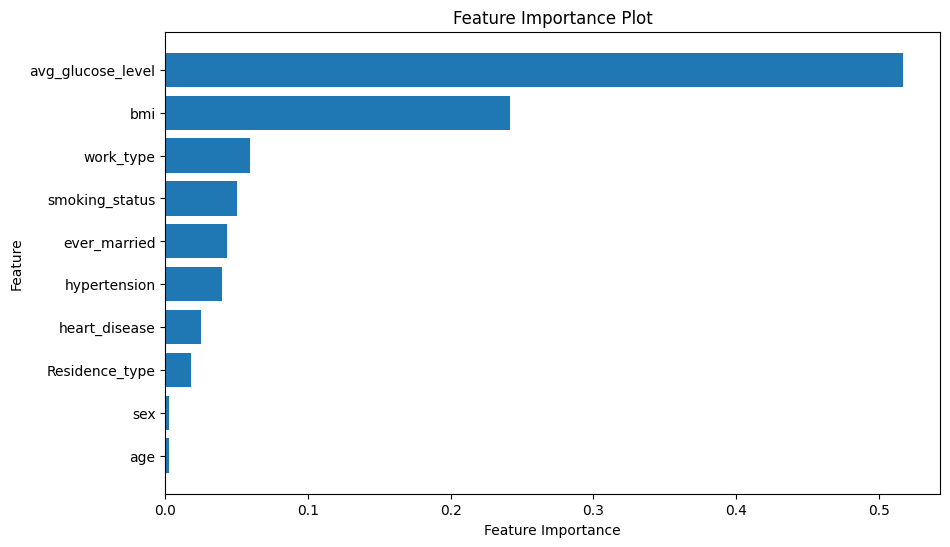

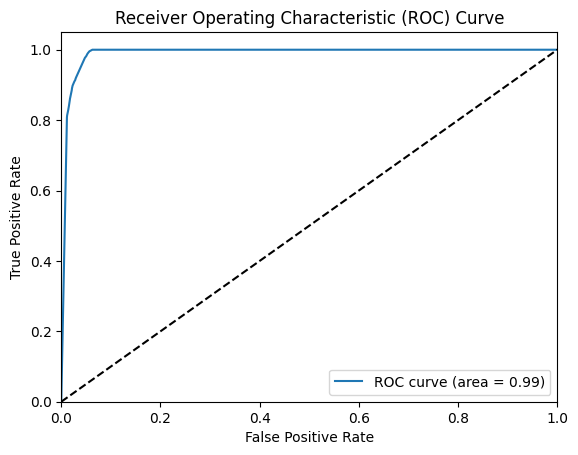

AUC Score: 0.9898677027281083


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9613733905579399, 0.9799713876967096, 0.9642346208869814, 0.9599427753934192, 0.9656652360515021, 0.9599427753934192, 0.9313304721030042, 0.9613733905579399, 0.9570200573065902, 0.9713467048710601]
Mean accuracy: 0.9612200810818565
95% confidence interval: (0.9523064743615457, 0.9701336878021674)


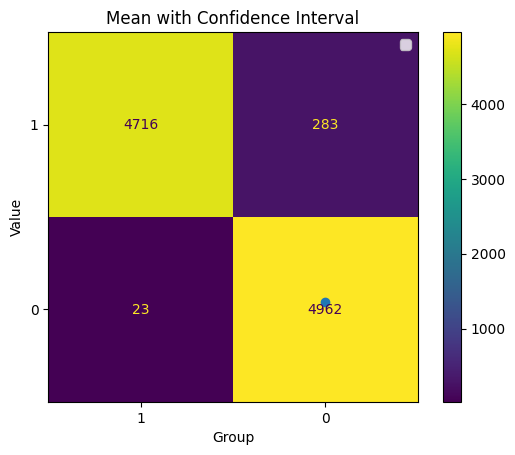

In [6]:
decision_tree = ML_algorithms.train_decision_tree_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_a)


**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 44.31741285324097
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.2, 'max_depth': 9, 'max_iter': 268, 'min_samples_leaf': 16}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3486
           1       1.00      1.00      1.00      3502

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1503
           1       0.98      1.00      0.99      1493

    accuracy                           0.99      2996
   macro avg       0.99      0.99      0.99      2996
weighted avg       0.99      0.99      0.99      2996


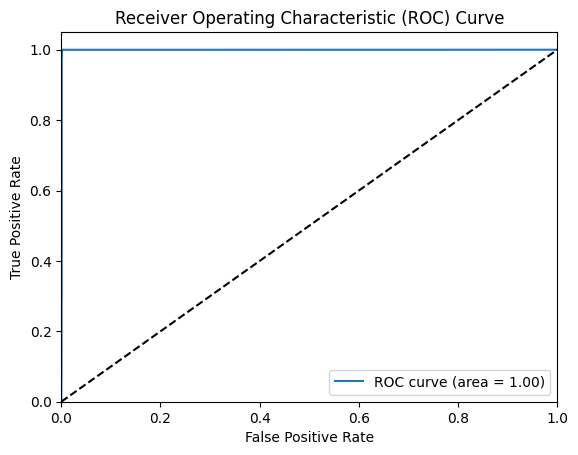

AUC Score: 0.9992869185672641


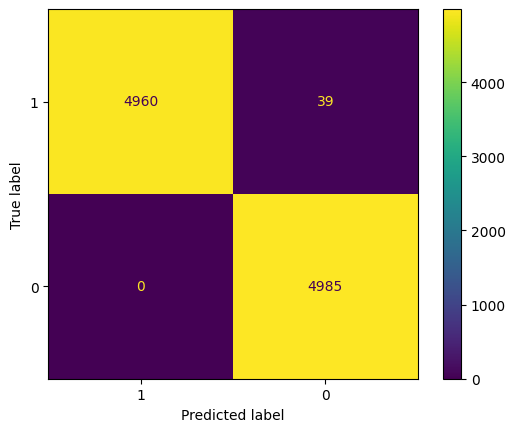

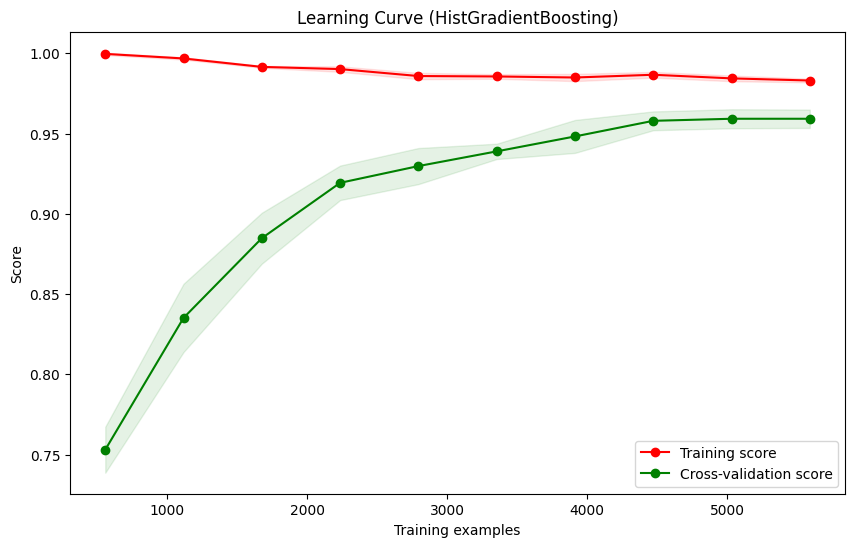

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9914163090128756, 0.9885550786838341, 0.9842632331902719, 0.9871244635193133, 0.9957081545064378, 0.9899856938483548, 0.9928469241773963, 0.994277539341917, 0.9899713467048711, 0.994269340974212]
Mean accuracy: 0.9908418083959484
95% confidence interval: (0.9882802472129968, 0.9934033695789)


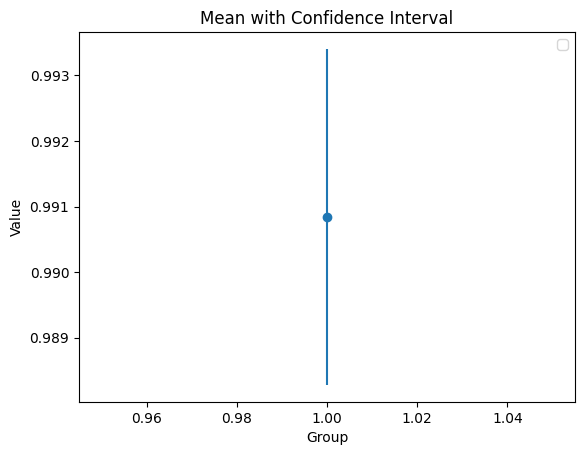

--------------------------------------


In [7]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_a)

print('--------------------------------------')

## avg_glucose_level

In [8]:
df = df_original.copy()

In [9]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [10]:
df_g = outliers_utils.outliers_replace(df, 'avg_glucose_level', 10)

Outliers found:


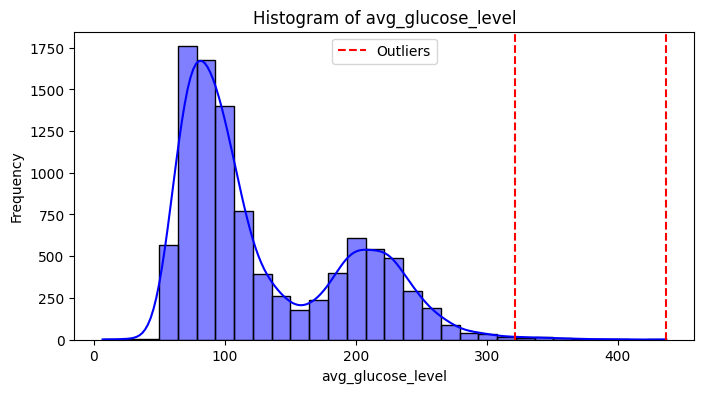

In [11]:
outliers_utils.visualize_outliers_specific(df_g, 'avg_glucose_level')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3500
           1       0.94      0.95      0.94      3488

    accuracy                           0.94      6988
   macro avg       0.94      0.94      0.94      6988
weighted avg       0.94      0.94      0.94      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1514
           1       0.90      0.94      0.92      1482

    accuracy                           0.92      2996
   macro avg       0.92      0.92      0.92      2996
weighted avg       0.92      0.92      0.92      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      4999
           1       0.93      0.98      0.96      4985

    accuracy                           0.96      9984


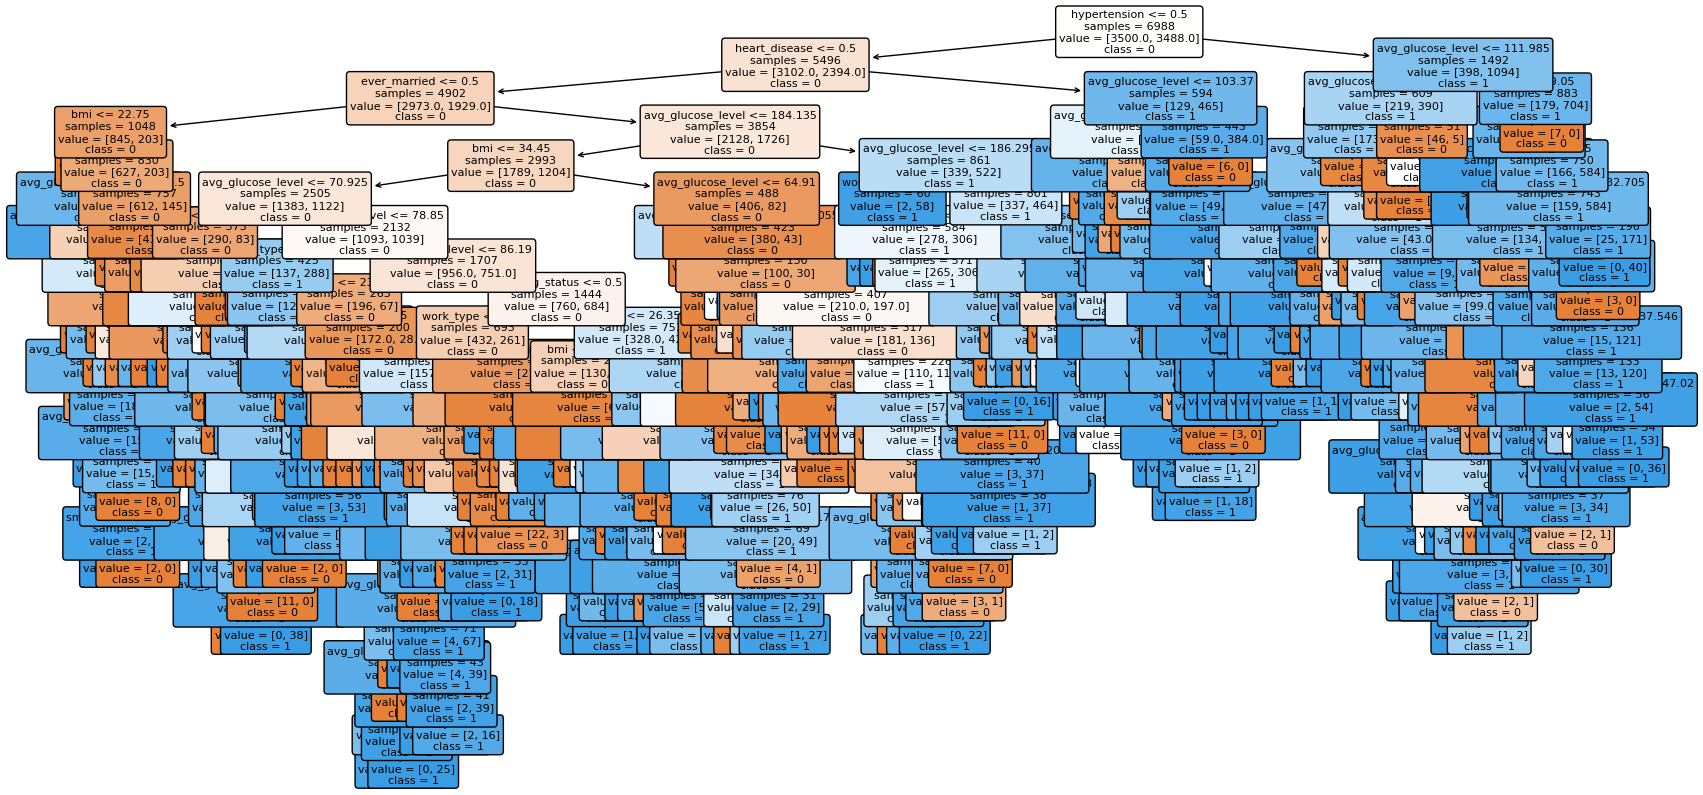

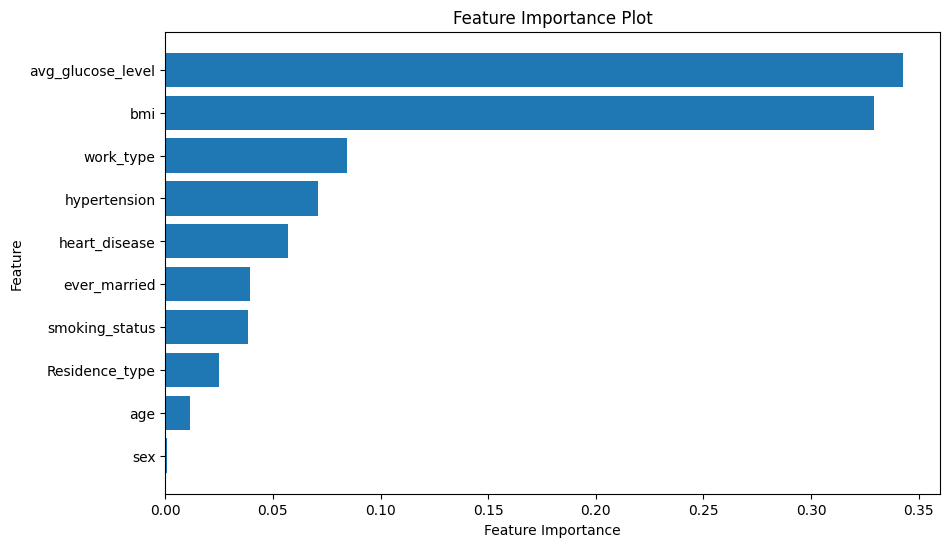

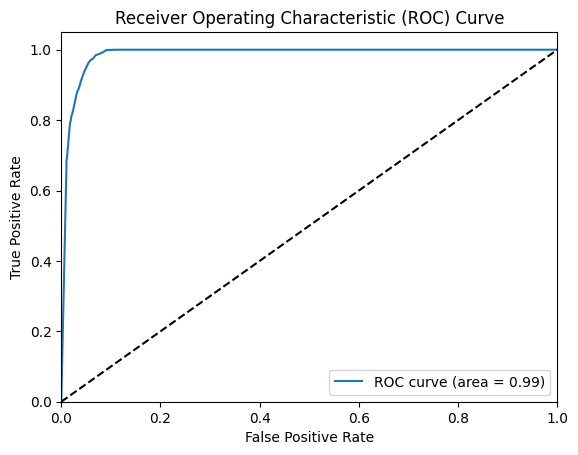

AUC Score: 0.986453459197356


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9141630901287554, 0.8912732474964234, 0.899856938483548, 0.9113018597997139, 0.8884120171673819, 0.9170243204577968, 0.9055793991416309, 0.8927038626609443, 0.9040114613180515, 0.8968481375358166]
Mean accuracy: 0.9021174334190063
95% confidence interval: (0.894987092364014, 0.9092477744739986)


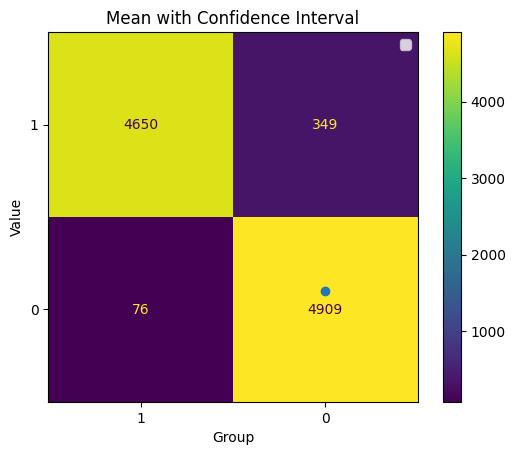

In [12]:
decision_tree = ML_algorithms.train_decision_tree_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_g)


**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 47.33820366859436
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.3, 'max_depth': 6, 'max_iter': 449, 'min_samples_leaf': 1}
Best score on training data:  0.972769092261966
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3500
           1       1.00      1.00      1.00      3488

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1514
           1       0.97      0.98      0.97      1482

    accuracy                           0.97      2996
   macro avg       0.97      0.97      0.97      2996
weighted avg       0.97      0.97      0.

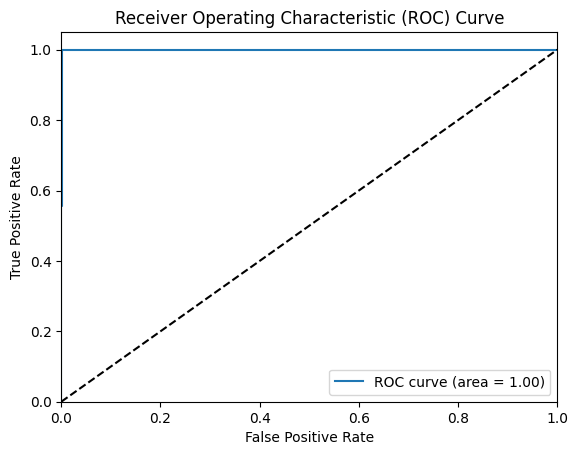

AUC Score: 0.9995748798706582


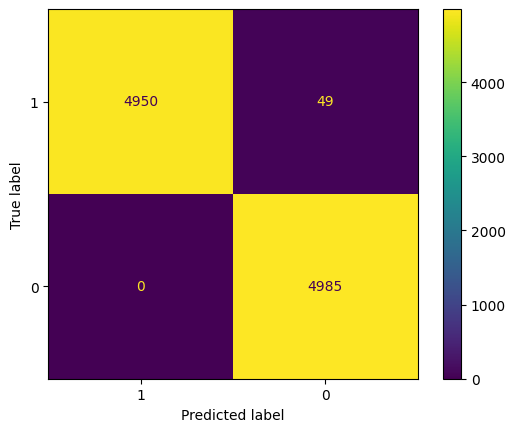

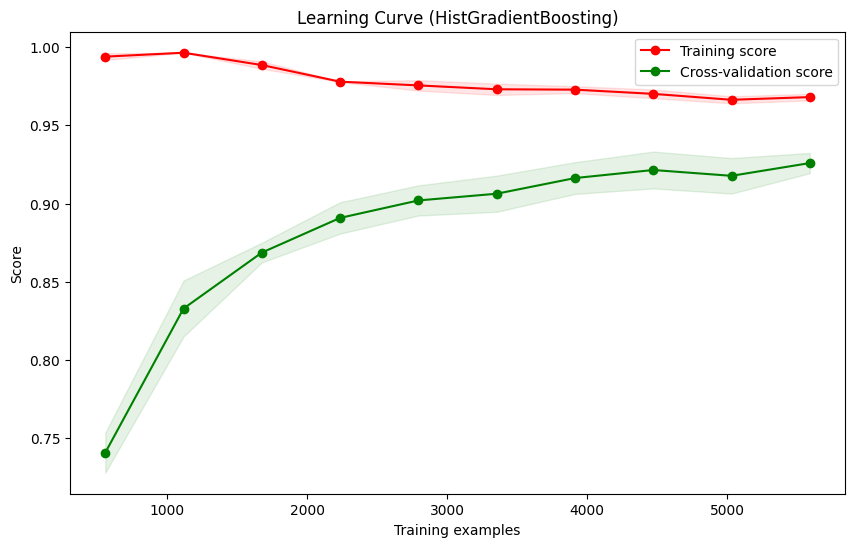

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9628040057224606, 0.9699570815450643, 0.9685264663805436, 0.9670958512160229, 0.9599427753934192, 0.9728183118741058, 0.9699570815450643, 0.9670958512160229, 0.9656160458452722, 0.9656160458452722]
Mean accuracy: 0.9669429516583247
95% confidence interval: (0.9642780533847324, 0.969607849931917)


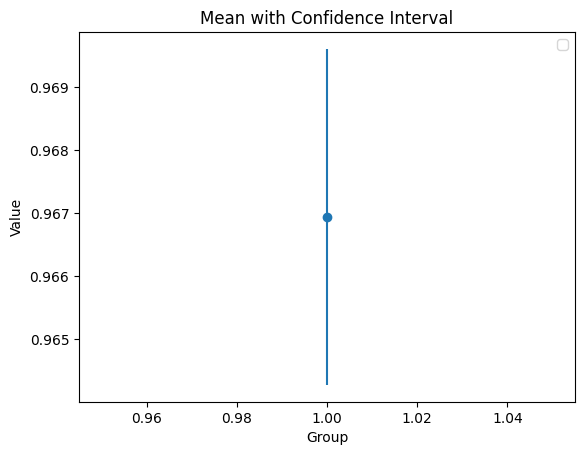

--------------------------------------


In [13]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_g)

print('--------------------------------------')

## bmi

In [14]:
df = df_original.copy()

--------------------------------------
Outliers found:


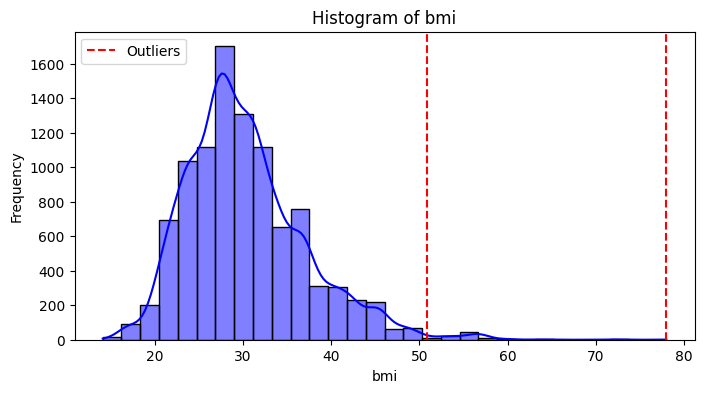

In [15]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [16]:
df_b = outliers_utils.outliers_replace(df, 'bmi', 10)

Outliers found:


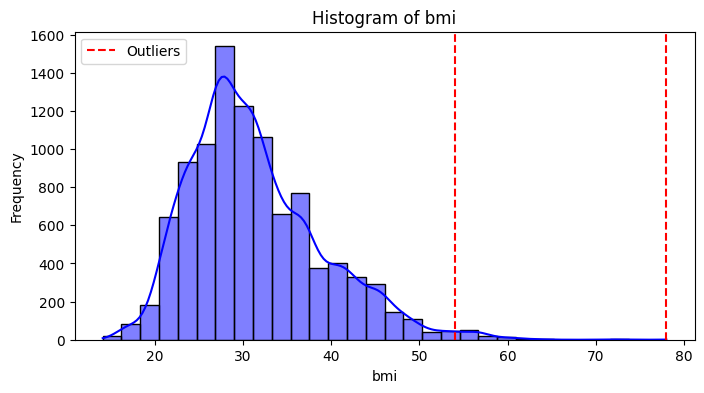

In [17]:
outliers_utils.visualize_outliers_specific(df_b, 'bmi')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3490
           1       0.97      0.97      0.97      3498

    accuracy                           0.97      6988
   macro avg       0.97      0.97      0.97      6988
weighted avg       0.97      0.97      0.97      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1530
           1       0.92      0.96      0.94      1466

    accuracy                           0.94      2996
   macro avg       0.94      0.94      0.94      2996
weighted avg       0.94      0.94      0.94      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      4999
           1       0.95      1.00      0.98      4985

    accuracy                           0.98      9984


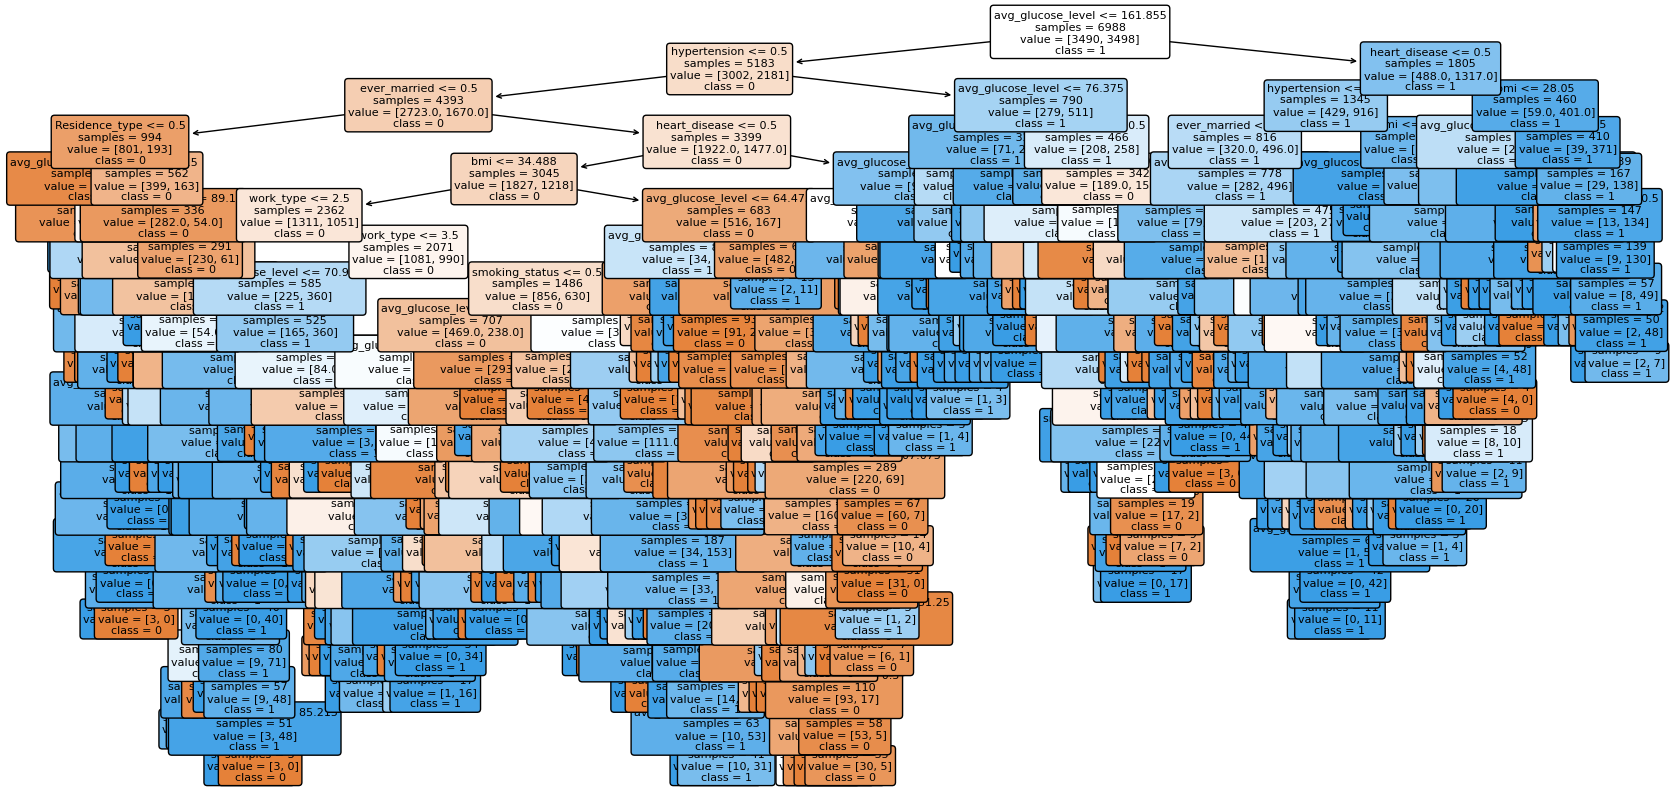

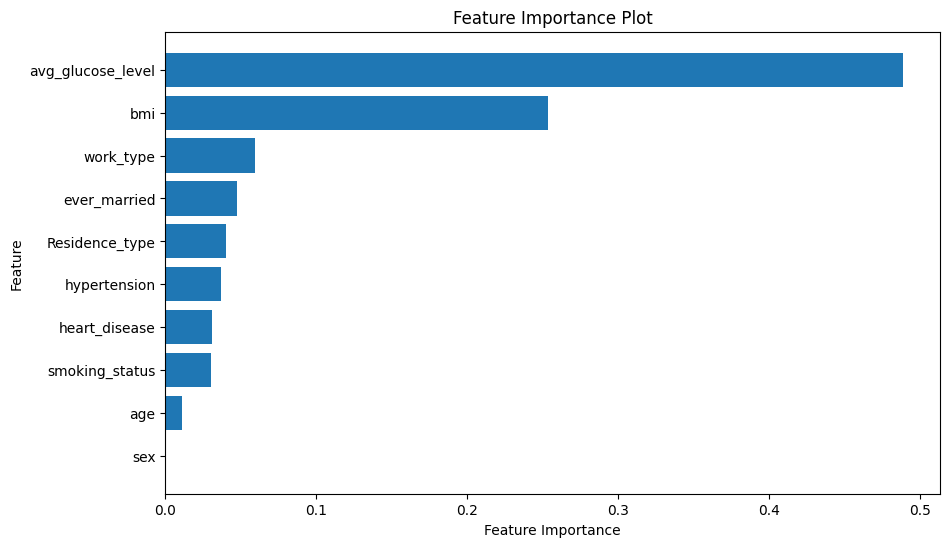

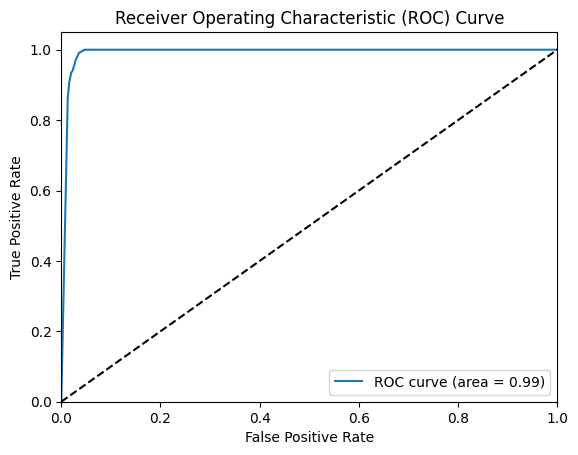

AUC Score: 0.9912926416777839


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9413447782546495, 0.9170243204577968, 0.9055793991416309, 0.9341917024320457, 0.9155937052932761, 0.9313304721030042, 0.9370529327610873, 0.9413447782546495, 0.9383954154727794, 0.9484240687679083]
Mean accuracy: 0.9310281572938827
95% confidence interval: (0.921201937644143, 0.9408543769436223)


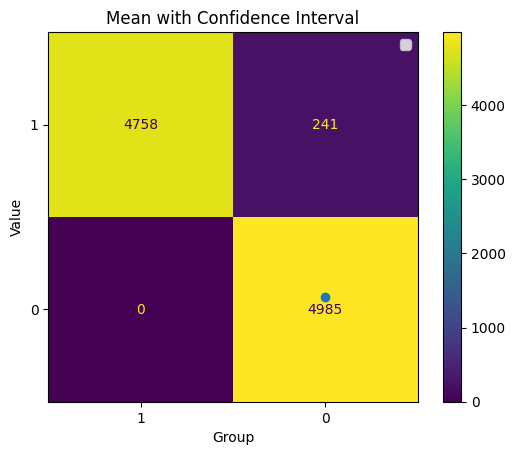

In [18]:
decision_tree = ML_algorithms.train_decision_tree_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_b)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 65.76185774803162
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.2, 'max_depth': 9, 'max_iter': 455, 'min_samples_leaf': 6}
Best score on training data:  0.9768465154302065
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3490
           1       1.00      1.00      1.00      3498

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1530
           1       0.96      0.98      0.97      1466

    accuracy                           0.97      2996
   macro avg       0.97      0.97      0.97      2996
weighted avg       0.97      0.97      0

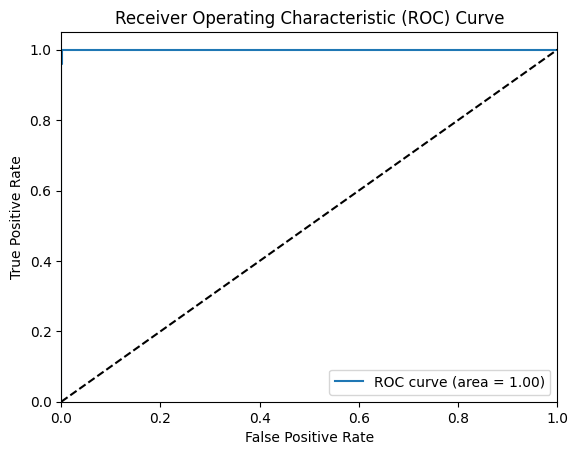

AUC Score: 0.9997912120036846


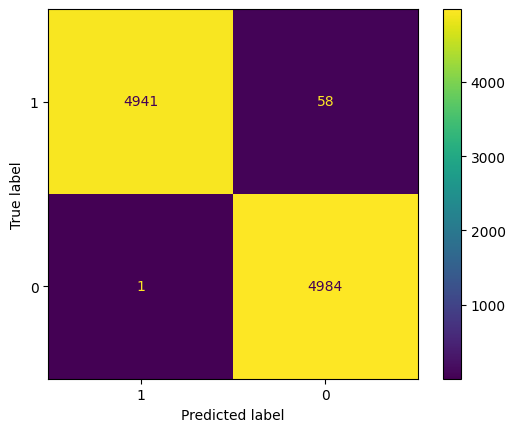

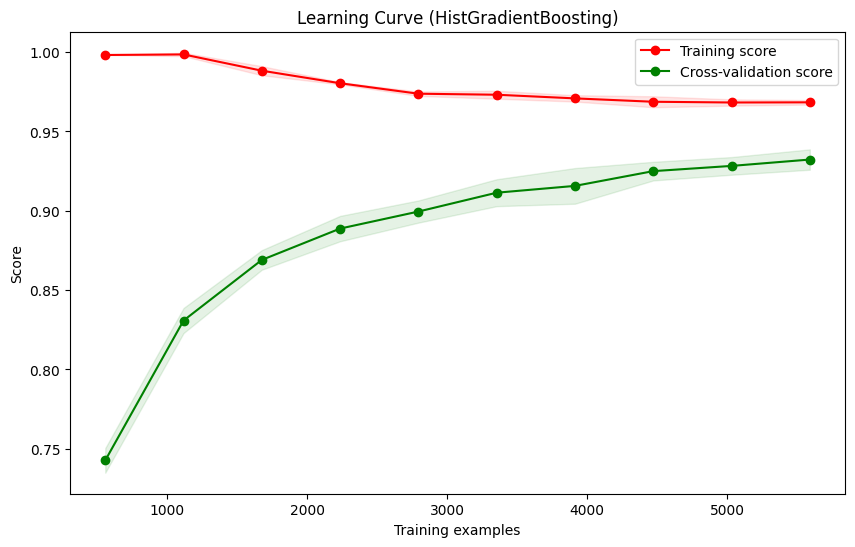

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9785407725321889, 0.9799713876967096, 0.9656652360515021, 0.9613733905579399, 0.9799713876967096, 0.9642346208869814, 0.9785407725321889, 0.9642346208869814, 0.9713467048710601, 0.9656160458452722]
Mean accuracy: 0.9709494939557534
95% confidence interval: (0.9655305281835688, 0.976368459727938)


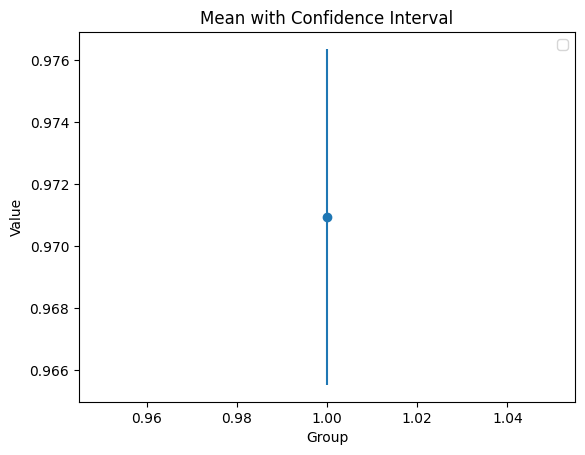

--------------------------------------


In [19]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_b)

print('--------------------------------------')

## Categorical

In [20]:
df = df_original.copy()

Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


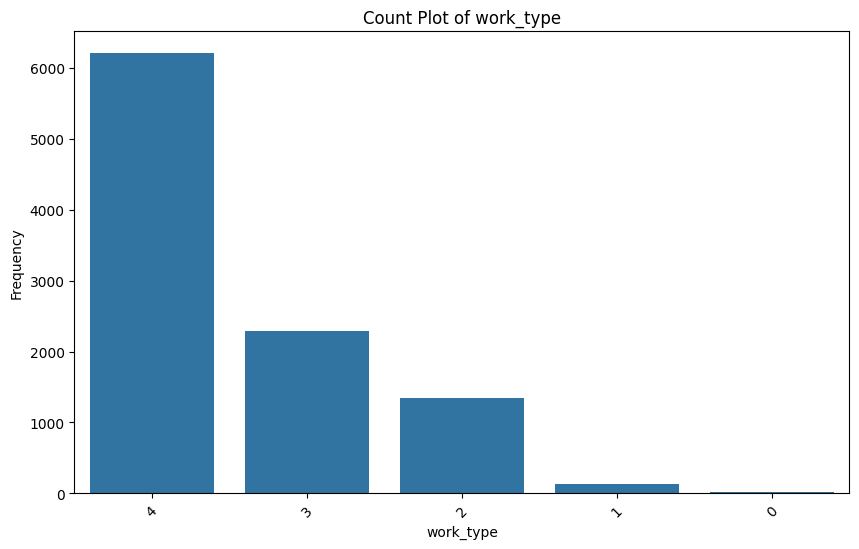

In [21]:
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [22]:
df_cat = outliers_utils.add_categorical_outliers('work_type', 10, df)

Valore meno frequente:  0


Value counts:
work_type
4    5602
3    2041
2    1205
0    1020
1     116
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 0, 1]
Outliers found:


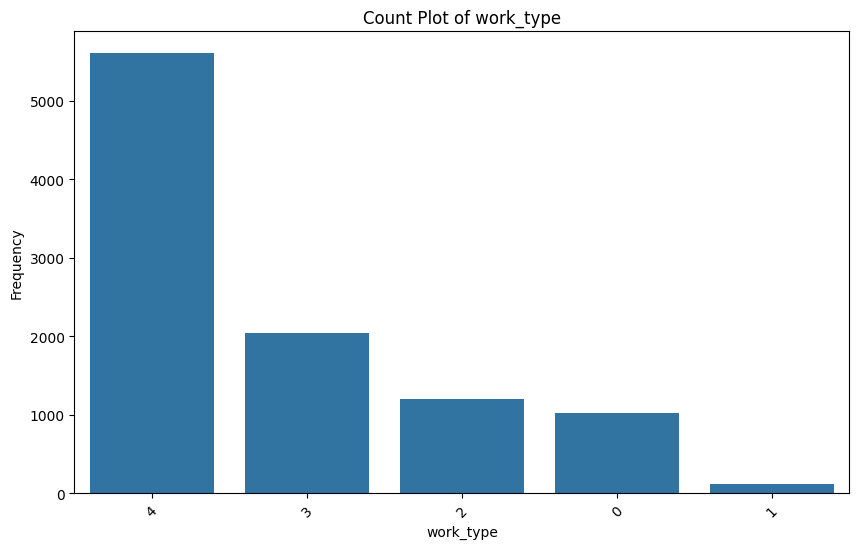

In [23]:
outliers_utils.visualize_outliers_categorical(df_cat, 'work_type')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3458
           1       0.97      0.98      0.98      3530

    accuracy                           0.97      6988
   macro avg       0.98      0.97      0.97      6988
weighted avg       0.98      0.97      0.97      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1541
           1       0.93      0.98      0.95      1455

    accuracy                           0.95      2996
   macro avg       0.95      0.95      0.95      2996
weighted avg       0.95      0.95      0.95      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4999
           1       0.96      0.99      0.97      4985

    accuracy                           0.97      9984


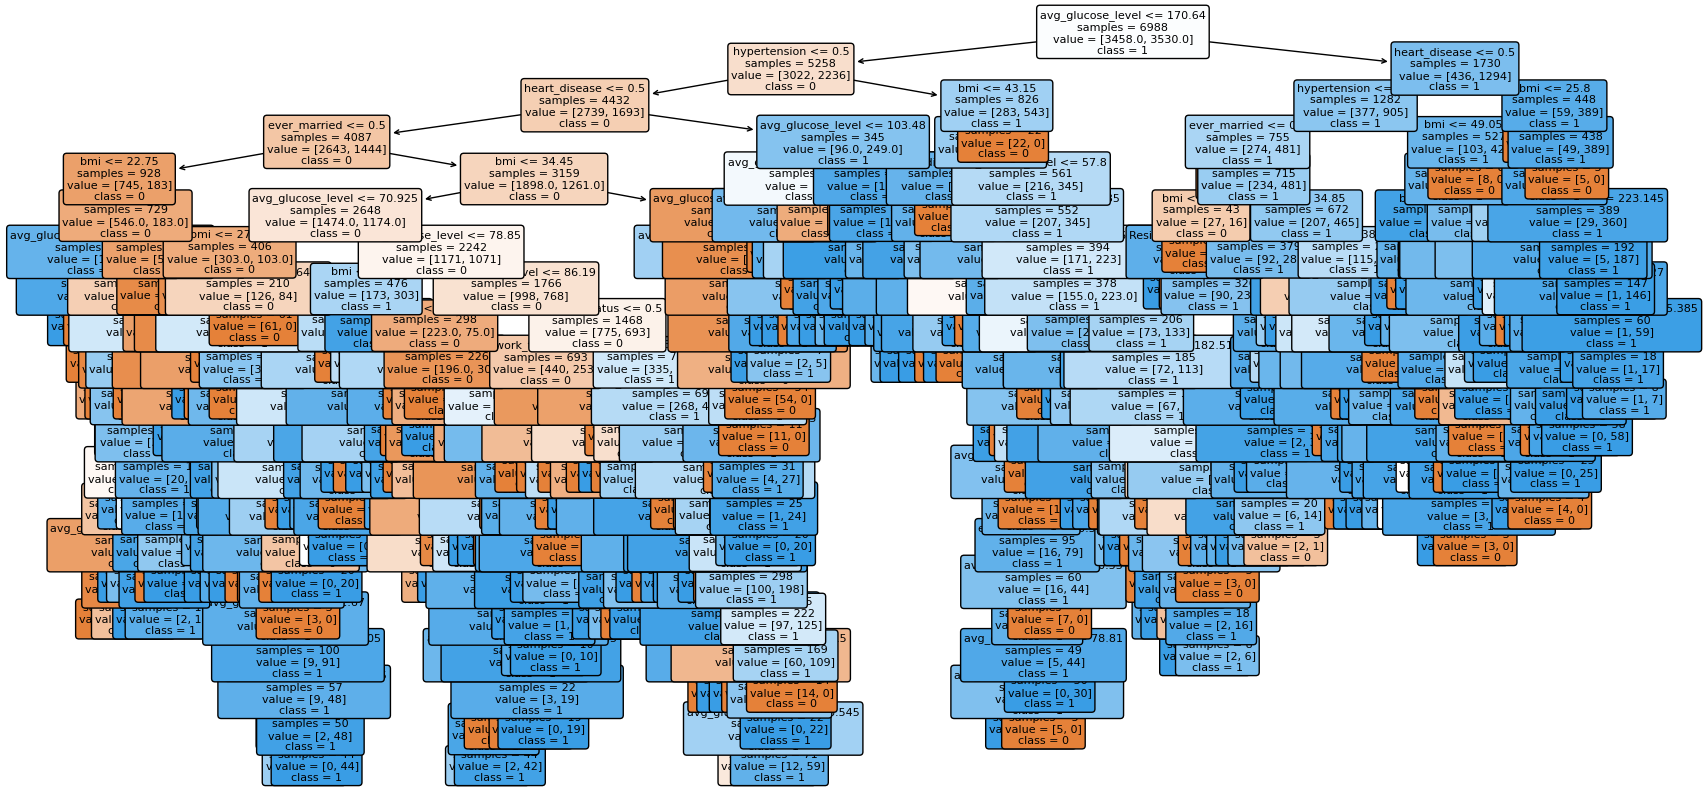

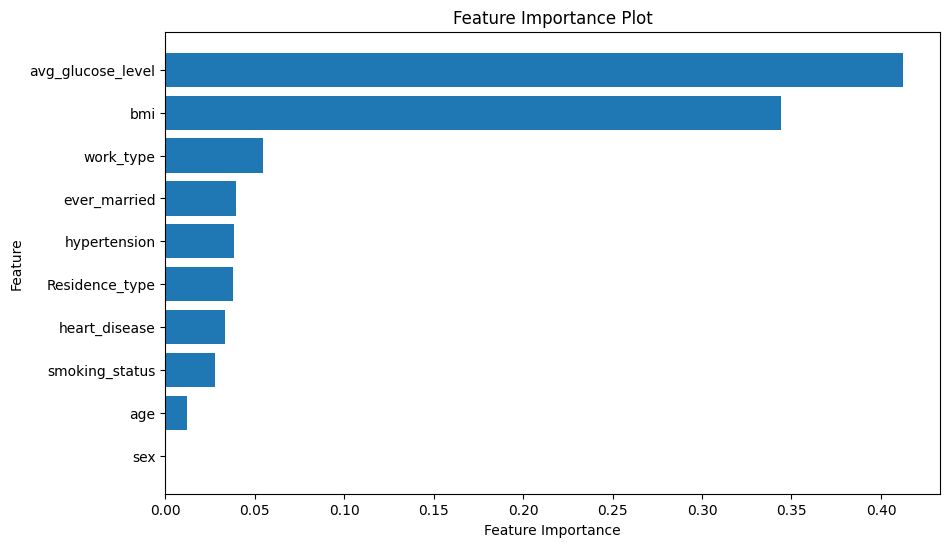

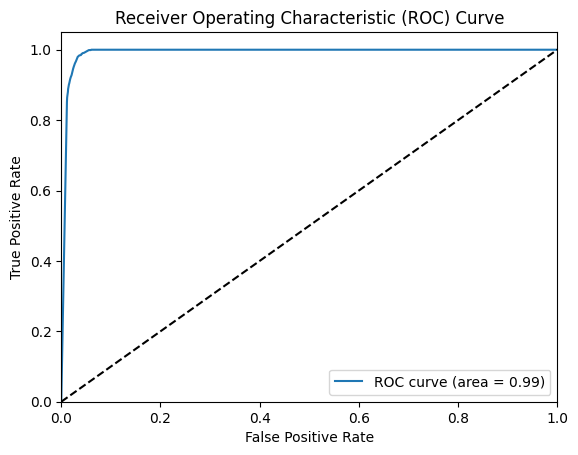

AUC Score: 0.9917591141096825


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9413447782546495, 0.9413447782546495, 0.9413447782546495, 0.9642346208869814, 0.949928469241774, 0.9570815450643777, 0.9599427753934192, 0.9284692417739628, 0.9469914040114613, 0.9613180515759312]
Mean accuracy: 0.9492000442711855
95% confidence interval: (0.9410412831526777, 0.9573588053896934)


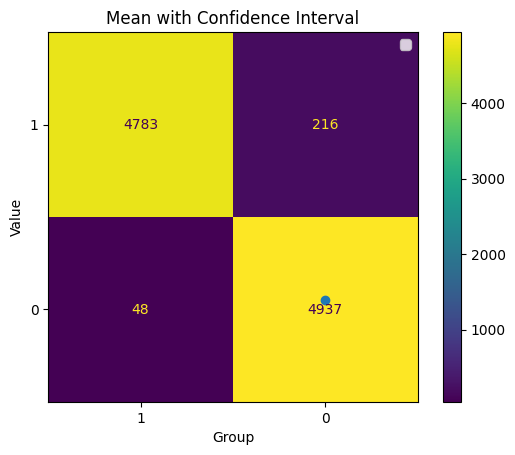

In [24]:
decision_tree = ML_algorithms.train_decision_tree_model(df_cat, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_cat)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 59.92035460472107
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.3, 'max_depth': 8, 'max_iter': 443, 'min_samples_leaf': 16}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3458
           1       1.00      1.00      1.00      3530

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1541
           1       0.98      1.00      0.99      1455

    accuracy                           0.99      2996
   macro avg       0.99      0.99      0.99      2996
weighted avg       0.99      0.99      0.99      2996


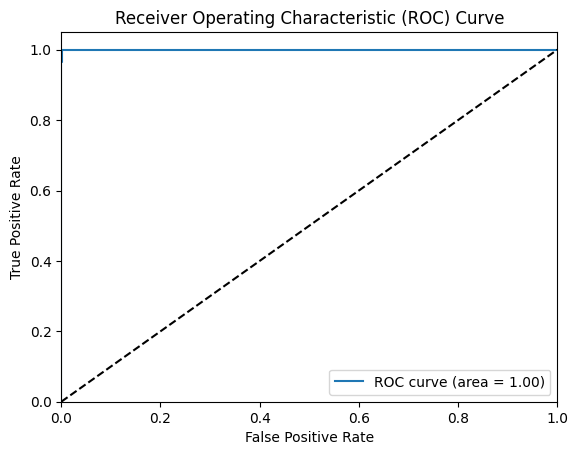

AUC Score: 0.9998058187364652


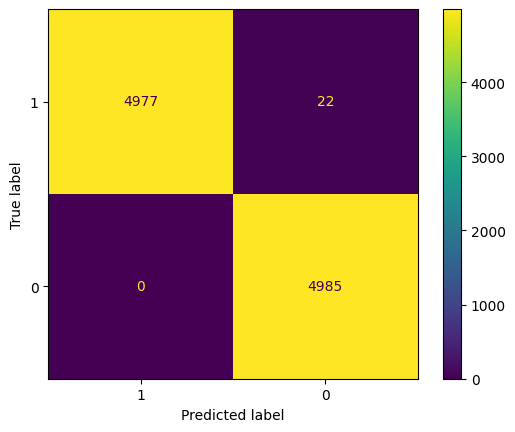

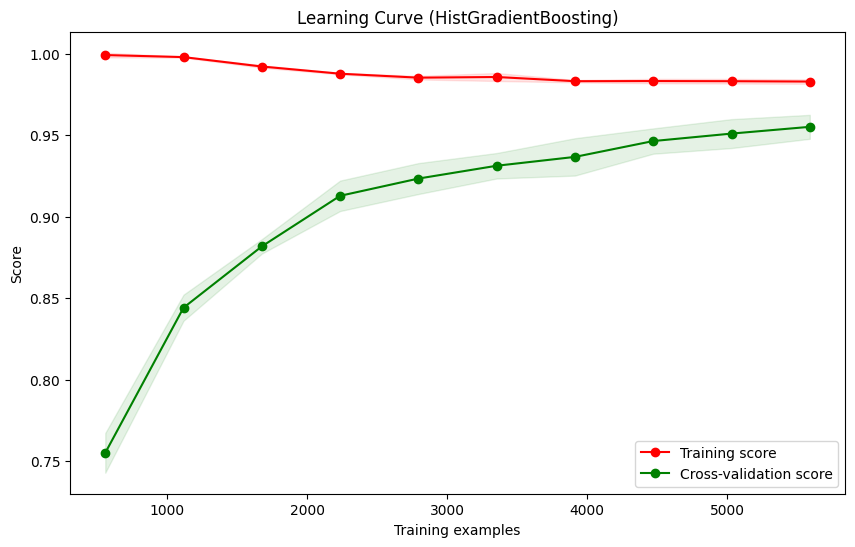

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9871244635193133, 0.9814020028612304, 0.9928469241773963, 0.9856938483547926, 0.9971387696709585, 0.9928469241773963, 0.9885550786838341, 0.9885550786838341, 0.9928366762177651, 0.9914040114613181]
Mean accuracy: 0.9898403777807839
95% confidence interval: (0.9866248241601403, 0.9930559314014276)


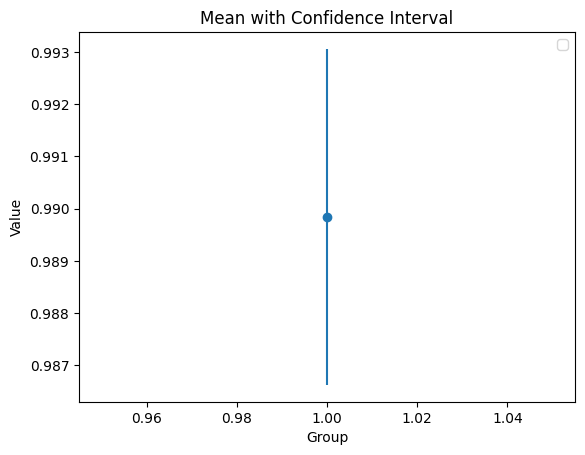

--------------------------------------


In [25]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_cat, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_cat)

print('--------------------------------------')